In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
np.random.seed(42)

In [4]:
datasets = ['BLK']
for dataset in datasets :
    Ticker = yf.Ticker(dataset)
    data = Ticker.history(start='2023-01-01', end='2023-10-12')
    filename = f'{dataset}_data.csv'
    data.to_csv(filename)
    print(f"Download data for {dataset} and saved as {filename}")

Download data for BLK and saved as BLK_data.csv


In [5]:
Ticker = 'BLK'
start_date = '2023-01-01'
end_date = '2023-10-12'

In [7]:
stock_data = yf.download(Ticker, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [8]:
stock_data

Date
2023-01-03    696.703979
2023-01-04    706.351685
2023-01-05    686.136597
2023-01-06    722.104858
2023-01-09    736.771973
                 ...    
2023-10-05    640.299988
2023-10-06    648.260010
2023-10-09    643.619995
2023-10-10    641.950012
2023-10-11    642.669983
Name: Adj Close, Length: 195, dtype: float64

In [9]:
daily_return = stock_data.pct_change().dropna()

In [10]:
cum_returns = np.cumsum(daily_return)

In [11]:
initial_price = stock_data.iloc[0]
simulated_prices = initial_price * np.exp(cum_returns)

In [12]:
time_periods = np.arange(0, len(simulated_prices))

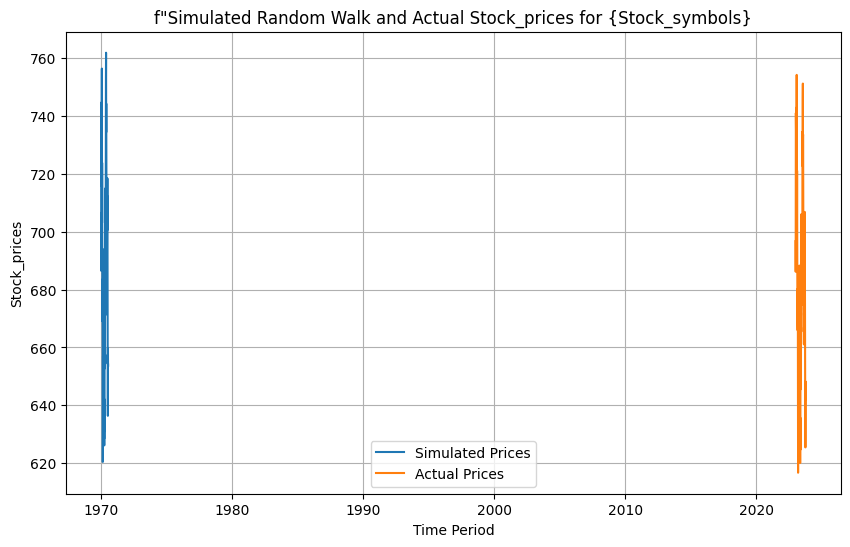

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(time_periods, simulated_prices, label='Simulated Prices')
plt.plot(stock_data.index, stock_data.values, label='Actual Prices')
plt.xlabel('Time Period')
plt.ylabel('Stock_prices')
plt.title('f"Simulated Random Walk and Actual Stock_prices for {Stock_symbols}')
plt.legend()
plt.grid(True)
plt.show()